In [1]:
import pandas as pd
import numpy  as np
import sklearn as sk
import math as ma
import scipy.stats as st
import matplotlib
from matplotlib import pylab as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
# load the data
df = pd.read_csv('whiskey_reviews.csv')
# drop the ID
df.head()
print(df.shape)

(2247, 7)


In [3]:
print(df['currency'].value_counts())

$    2247
Name: currency, dtype: int64


In [4]:
df.drop(columns=['ID','currency'],inplace=True)
df.head()

,name,category,review.point,price,description
0,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,"Magnificently powerful and intense. Caramels, ..."
1,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500,What impresses me most is how this whisky evol...
2,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500,There have been some legendary Bowmores from t...
3,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,With a name inspired by a 1926 Buster Keaton m...
4,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,"Captivating, enticing, and wonderfully charmin..."


In [5]:
print(df['category'].value_counts())

Single Malt Scotch            1819
Blended Scotch Whisky          211
Blended Malt Scotch Whisky     132
Single Grain Whisky             57
Grain Scotch Whisky             28
Name: category, dtype: int64


In [6]:
df['price'].describe()

count     2247
unique     453
top        100
freq        85
Name: price, dtype: object

In [7]:
df.loc[df['price'] == '$15,000 or $60,000/set']

,name,category,review.point,price,description
19,"Balvenie 1973 43 year old, 46.6%",Single Malt Scotch,95,"$15,000 or $60,000/set",This expression was matured in a European oak ...


In [8]:
df['price']=df['price'].apply(lambda x:x.replace(',',''))
df['price']=df['price'].apply(lambda x:x.replace('.',''))
df['description']=df['description'].apply(lambda x:x.replace(',',''))
df['name']=df['name'].apply(lambda x:x.replace('.',''))
df['description']=df['description'].apply(lambda x:x.replace(')',''))
df['name']=df['name'].apply(lambda x:x.replace(')',''))
df['description']=df['description'].apply(lambda x:x.replace('(',''))
df['name']=df['name'].apply(lambda x:x.replace('(',''))

In [9]:
df['price'] = df['price'].replace(['$15000 or $60000/set'], '15000')
df['price'] = df['price'].replace(['60000/set'], '60000')
df['price'] = df['price'].replace(['44/liter'], '44')

In [10]:
df['price'] = df['price'].astype(int)

In [11]:
df['price'].describe()

count      2247.000000
mean        709.205607
std        5660.577607
min          12.000000
25%          70.000000
50%         110.000000
75%         200.000000
max      157000.000000
Name: price, dtype: float64

In [12]:
df['review.point'].describe()

count    2247.000000
mean       86.700045
std         4.054055
min        63.000000
25%        84.000000
50%        87.000000
75%        90.000000
max        97.000000
Name: review.point, dtype: float64

In [13]:
hotenc=OneHotEncoder(sparse=False)

df['category'].unique()

df_cat=hotenc.fit_transform(df[['category']])
hotenc.get_feature_names()

df_cat= pd.DataFrame(df_cat)
df_cat.columns = hotenc.get_feature_names()

df_cat.head()

,x0_Blended Malt Scotch Whisky,x0_Blended Scotch Whisky,x0_Grain Scotch Whisky,x0_Single Grain Whisky,x0_Single Malt Scotch
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [14]:
df=df.drop(['category'],axis=1)

In [15]:
df=pd.concat([df,df_cat],axis=1)
df.head()

,name,review.point,price,description,x0_Blended Malt Scotch Whisky,x0_Blended Scotch Whisky,x0_Grain Scotch Whisky,x0_Single Grain Whisky,x0_Single Malt Scotch
0,"Johnnie Walker Blue Label, 40%",97,225,Magnificently powerful and intense. Caramels d...,0.0,1.0,0.0,0.0,0.0
1,"Black Bowmore, 1964 vintage, 42 year old, 405%",97,4500,What impresses me most is how this whisky evol...,0.0,0.0,0.0,0.0,1.0
2,"Bowmore 46 year old distilled 1964, 429%",97,13500,There have been some legendary Bowmores from t...,0.0,0.0,0.0,0.0,1.0
3,"Compass Box The General, 534%",96,325,With a name inspired by a 1926 Buster Keaton m...,1.0,0.0,0.0,0.0,0.0
4,"Chivas Regal Ultis, 40%",96,160,Captivating enticing and wonderfully charming ...,1.0,0.0,0.0,0.0,0.0


In [16]:
sscaler = StandardScaler()
mmscaler = MinMaxScaler()

In [17]:
df[['review.point']]=mmscaler.fit_transform(df[['review.point']])
df[['price']]=sscaler.fit_transform(df[['price']])

In [18]:
df.head()

,name,review.point,price,description,x0_Blended Malt Scotch Whisky,x0_Blended Scotch Whisky,x0_Grain Scotch Whisky,x0_Single Grain Whisky,x0_Single Malt Scotch
0,"Johnnie Walker Blue Label, 40%",1.000000,-0.085559,Magnificently powerful and intense. Caramels d...,0.0,1.0,0.0,0.0,0.0
1,"Black Bowmore, 1964 vintage, 42 year old, 405%",1.000000,0.669832,What impresses me most is how this whisky evol...,0.0,0.0,0.0,0.0,1.0
2,"Bowmore 46 year old distilled 1964, 429%",1.000000,2.260130,There have been some legendary Bowmores from t...,0.0,0.0,0.0,0.0,1.0
3,"Compass Box The General, 534%",0.970588,-0.067889,With a name inspired by a 1926 Buster Keaton m...,1.0,0.0,0.0,0.0,0.0
4,"Chivas Regal Ultis, 40%",0.970588,-0.097044,Captivating enticing and wonderfully charming ...,1.0,0.0,0.0,0.0,0.0


In [19]:
#using NLTK library, we can do lot of text preprocesing
import nltk as nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
#function to split text into word
#tokens = word_tokenize("The quick brown fox jumps over the lazy dog")
#nltk.download('stopwords')
#print(tokens)

In [20]:
df['description']=df['description'].str.lower()
df['name']=df['name'].str.lower()

In [21]:
stop_words=set(stopwords.words('english'))

In [22]:
from nltk.tokenize import word_tokenize

In [23]:
description = df.description.str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(description)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:10]

10465


['.', 'and', 'the', 'a', 'of', 'with', 'in', 'is', 'this', 'to']

In [29]:
tokens = [t for t in description.split()]

In [30]:
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))

magnificently:2
powerful:35
intense.:1
caramels:20
dried:315
peats:5
elegant:55
cigar:28
smoke:539
seeds:12
scraped:1
vanilla:835
beans:8
brand:14
new:206
pencils:3
peppercorn:11
coriander:16
star:12
anise:57
make:60
deeply:10
satisfying:25
nosing:5
experience.:14
silky:74
bountiful:2
fruits:413
ripe:241
peach:95
stewed:61
apple:235
orange:403
pith:7
pervasive:1
elements:30
burnt:50
tobacco.:15
abiding:1
finish:776
dry:335
spices:293
banoffee:13
pie:55
sweetness.:55
close:15
perfection.:2
editor's:9
choice:16
impresses:4
whisky:813
evolves;:1
incredibly:20
complex.:23
nose:863
palate:1014
thick:143
viscous:54
notes:901
sticky:34
toffee:478
earthy:107
oak:715
fig:46
cake:74
roasted:87
nuts:117
fallen:8
fruit:740
pancake:5
batter:3
black:270
cherry:81
dark:292
chocolate-covered:21
espresso:22
bean:16
polished:120
leather:179
tobacco:69
hint:395
wild:11
game:5
lingering:122
leafy:18
damp:95
kiln:25
smoke.:178
flavors:247
continue:13
long:345
swallowing.:3
hope:4
dream:1
older:67
whisky!:5

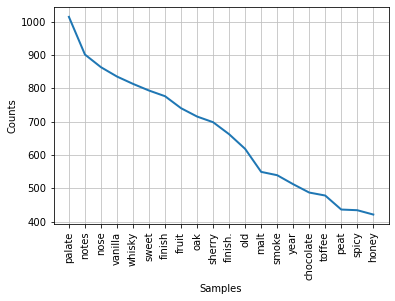

In [33]:
freq.plot(20, cumulative=False)